# Daily Challenge : Analysis Of Airplane Crashes And Fatalities

Objective:
Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.

## Data Import and Cleaning:

Import the dataset using Pandas.

Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
try:
    df = pd.read_csv('Airplane_Crashes_and_Fatalities.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Airplane_Crashes_and_Fatalities.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('Airplane_Crashes_and_Fatalities.csv', encoding='cp1252')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,3/5/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,9/3/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,7/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,9/24/1916,1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


In [5]:
# the number of missing values in each column
df.isna().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     776
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [6]:
# checking for duplicate strings
df.duplicated().sum()

0

In [7]:
# Convert 'Date' and 'Time' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='%H:%M')

<div style="border:solid green 2px; padding: 20px">

This dataset contains the following data:
- It contains 17 columns and 4998 rows.
- Date and Time columns are in object format, they need to be converted to datetime format.
- There are missing values in all columns except date.
- There are no duplicates in the dataset.

## Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

Analyze the frequency of crashes over time to identify any trends.

Basic Statistics:
Total Crashes: 4998
Total Fatalities: 111644.0
Total Survivors: 43712.0
Survival Rate: 0.2813666675249105


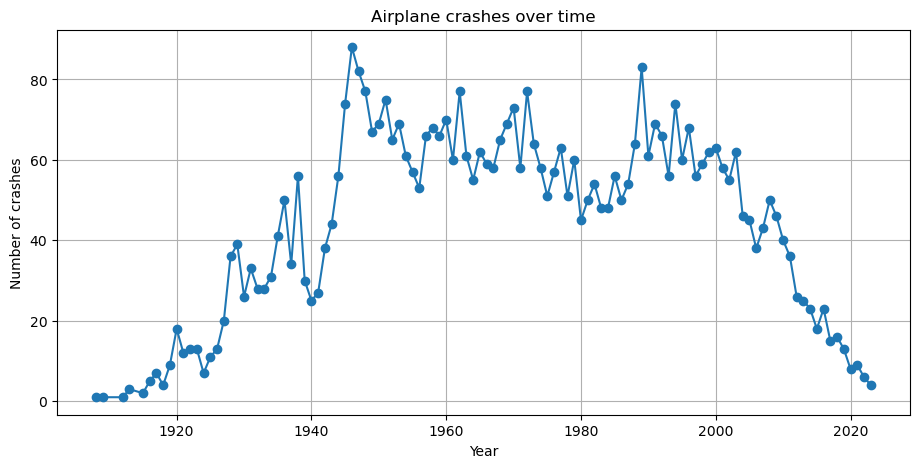

In [12]:
# Display basic statistics
total_crashes = len(df)
total_fatalities = df['Fatalities'].sum()
total_survivors = df['Aboard'].sum() - total_fatalities
survival_rate = total_survivors / df['Aboard'].sum()

print("Basic Statistics:")
print("Total Crashes:", total_crashes)
print("Total Fatalities:", total_fatalities)
print("Total Survivors:", total_survivors)
print("Survival Rate:", survival_rate)

# Analyze the frequency of crashes over time
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()

# Plotting the trend of crashes over time
plt.figure(figsize=(11, 5))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title('Airplane crashes over time')
plt.xlabel('Year')
plt.ylabel('Number of crashes')
plt.grid(True)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The most crashes occurred between 1945 and 2002. Since 2003, the number of crashes has decreased significantly.

## Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

In [15]:
# Assuming 'Date' is in datetime format
df['Decade'] = (df['Date'].dt.year // 10) * 10

# Analyze the distribution of fatalities
fatalities_mean = df['Fatalities'].mean()
fatalities_median = df['Fatalities'].median()
fatalities_std = df['Fatalities'].std()

print("Fatalities Distribution Statistics:")
print("Mean:", fatalities_mean)
print("Median:", fatalities_median)
print("Standard Deviation:", fatalities_std)

# Conduct a hypothesis test
decades = df['Decade'].unique()
for decade in decades:
    subset = df[df['Decade'] == decade]['Fatalities']
    _, p_value = stats.ttest_1samp(subset, fatalities_mean)
    
    print(f"\nHypothesis Test for Decade {decade}s:")
    print(f"P-Value: {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference in fatalities.")
    else:
        print("Fail to reject the null hypothesis. No significant difference in fatalities.")

Fatalities Distribution Statistics:
Mean: 22.37354709418838
Median: 11.0
Standard Deviation: 35.06174065974314

Hypothesis Test for Decade 1900s:
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in fatalities.

Hypothesis Test for Decade 1910s:
P-Value: 2.7123163032731522e-05
Reject the null hypothesis. There is a significant difference in fatalities.

Hypothesis Test for Decade 1920s:
P-Value: nan
Fail to reject the null hypothesis. No significant difference in fatalities.

Hypothesis Test for Decade 1930s:
P-Value: nan
Fail to reject the null hypothesis. No significant difference in fatalities.

Hypothesis Test for Decade 1940s:
P-Value: nan
Fail to reject the null hypothesis. No significant difference in fatalities.

Hypothesis Test for Decade 1950s:
P-Value: nan
Fail to reject the null hypothesis. No significant difference in fatalities.

Hypothesis Test for Decade 1960s:
P-Value: 0.00013538373734622936
Reject the null hypothesis. There is a significant di

C:\Users\Acer\AppData\Local\Temp\ipykernel_6940\3035061135.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_value = stats.ttest_1samp(subset, fatalities_mean)


## Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

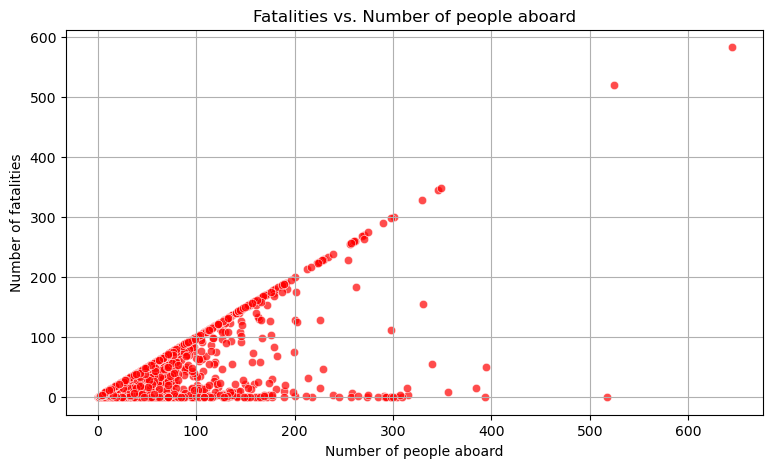

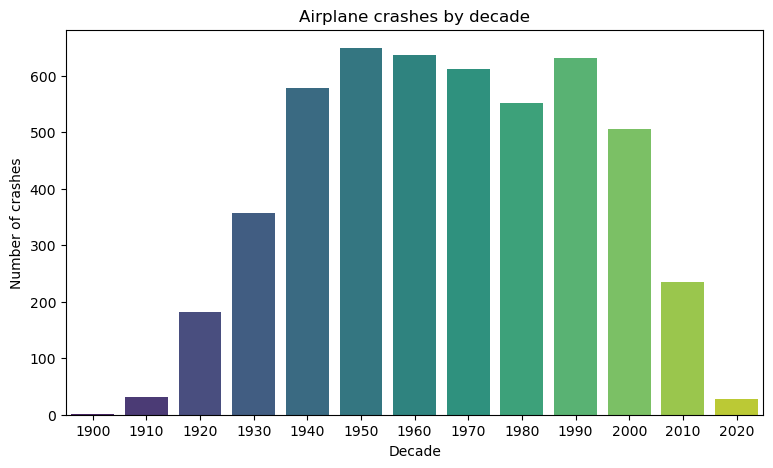

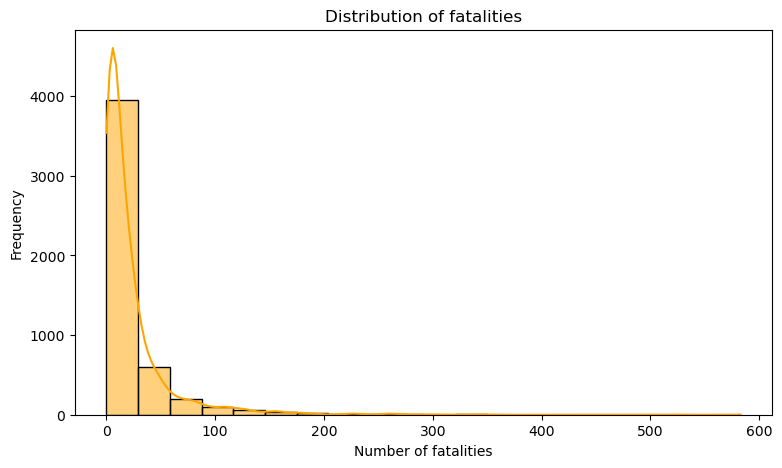

In [20]:
# Scatter plot of fatalities vs. number of people aboard
plt.figure(figsize=(9, 5))
sns.scatterplot(x='Aboard', y='Fatalities', data=df, color='red', alpha=0.7)
plt.title('Fatalities vs. Number of people aboard')
plt.xlabel('Number of people aboard')
plt.ylabel('Number of fatalities')
plt.grid(True)
plt.show()

# Bar chart of crashes by decade
plt.figure(figsize=(9, 5))
sns.countplot(x='Decade', data=df, palette='viridis')
plt.title('Airplane crashes by decade')
plt.xlabel('Decade')
plt.ylabel('Number of crashes')
plt.show()

# Histogram of fatalities
plt.figure(figsize=(9, 5))
sns.histplot(df['Fatalities'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of fatalities')
plt.xlabel('Number of fatalities')
plt.ylabel('Frequency')
plt.show()

## Insight and Report:

Summarize your findings and provide insights into the patterns or anomalies discovered in the data.

<div style="border:solid green 2px; padding: 20px">
    
- In most cases, the more passengers on board, the greater the number of fatalities.
- The time series plot of airplane crashes over the years reveals a general upward trend, indicating an increase in the number of reported crashes. However, this could be influenced by improved reporting mechanisms and increased air travel over time.
- The decades of the 1950s, 1960s, and 1990s had the most wrecks. The least number of crashes in the 2010s. Statistics for the 2020s are incomplete because data is only available through 2023.
- The histogram of fatalities illustrates that the majority of crashes result in a relatively low number of fatalities. However, there are instances of high-fatality crashes, as evident from the right tail of the distribution.
- The scatter plot of fatalities vs. the number of people aboard suggests a positive correlation between these two variables. Larger airplanes, carrying more people, tend to experience higher numbers of fatalities in the event of a crash.
- While the number of crashes has increased over the years, advancements in aviation safety technology and regulations may have contributed to a decrease in the average number of fatalities per crash.